In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

df = pd.read_csv("/content/avocado-updated-2020.csv")
df


This datset tell us about the sales occured in USA during January 2015 to November 2020.

Following are the features of the dataset:

date: The date of the record

average_price: Average price of avocados

total_volume: Total volume of avocados sold

4046, 4225, 4770: Avocado sizes or varieties

total_bags, small_bags, large_bags, xlarge_bags: Types of avocado bags sold

type: Avocado type (either "organic" or "conventional")

year: Year of the data

geography: Geographic region where avocados were sold

In [2]:

avocado_clean = df.rename(columns={'4046': 'small', '4225': 'large', '4770': 'XL'})
avocado_clean

,date,average_price,total_volume,small,large,XL,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [3]:
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [4]:
major_regions = ['Northeast', 'Southeast', 'West']
state_regions = ['California', 'Great Lakes', 'Midsouth', 'Plains', 'South Carolina', 'South Central']
metro_regions = [
    'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester', 'Charlotte',
    'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids',
    'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas',
    'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 'New York',
    'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Portland',
    'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco',
    'Seattle', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa'
]

avocado_clean['major_region'] = avocado_clean['geography'].where(avocado_clean['geography'].isin(major_regions))
avocado_clean['state_region'] = avocado_clean['geography'].where(avocado_clean['geography'].isin(state_regions))
avocado_clean['metro_region'] = avocado_clean['geography'].where(avocado_clean['geography'].isin(metro_regions))
avocado_clean.drop(columns=['geography'], inplace=True)
avocado_clean


,date,average_price,total_volume,small,large,XL,total_bags,small_bags,large_bags,xlarge_bags,type,year,major_region,state_region,metro_region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,NaN,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,NaN,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,NaN,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,NaN,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,NaN,NaN,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,NaN,NaN,NaN
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,NaN,NaN
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,NaN,NaN
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,NaN,NaN,NaN


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [5]:
df_filtered2017 = avocado_clean[(avocado_clean['type'] == 'organic') & (avocado_clean['year'] == 2017)]

df_grouped = df_filtered2017.groupby('major_region')['small'].sum().reset_index()

top_region = df_grouped.loc[df_grouped['small'].idxmax()]

print("The region with the most sales is " + top_region['major_region'] + " with " + str(top_region['small']) + " small Hass sold.")

The region with the most sales is West with 1870206.29 small Hass sold.


4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [6]:

avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['year'] = avocado_clean['date'].dt.year

average_volume_by_month = avocado_clean.groupby('month')['total_volume'].mean().reset_index()

highest_month = average_volume_by_month.loc[average_volume_by_month['total_volume'].idxmax()]

month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
highest_month_name = month_names[int(highest_month['month']) - 1]

print(f"The month with the highest average volume of avocado sales is {highest_month_name} with an average volume of {highest_month['total_volume']:.2f}.")


The month with the highest average volume of avocado sales is May with an average volume of 1123632.25.


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.


In [7]:
top_five_metro = avocado_clean.groupby('metro_region')['total_volume'].mean().nlargest(5).index

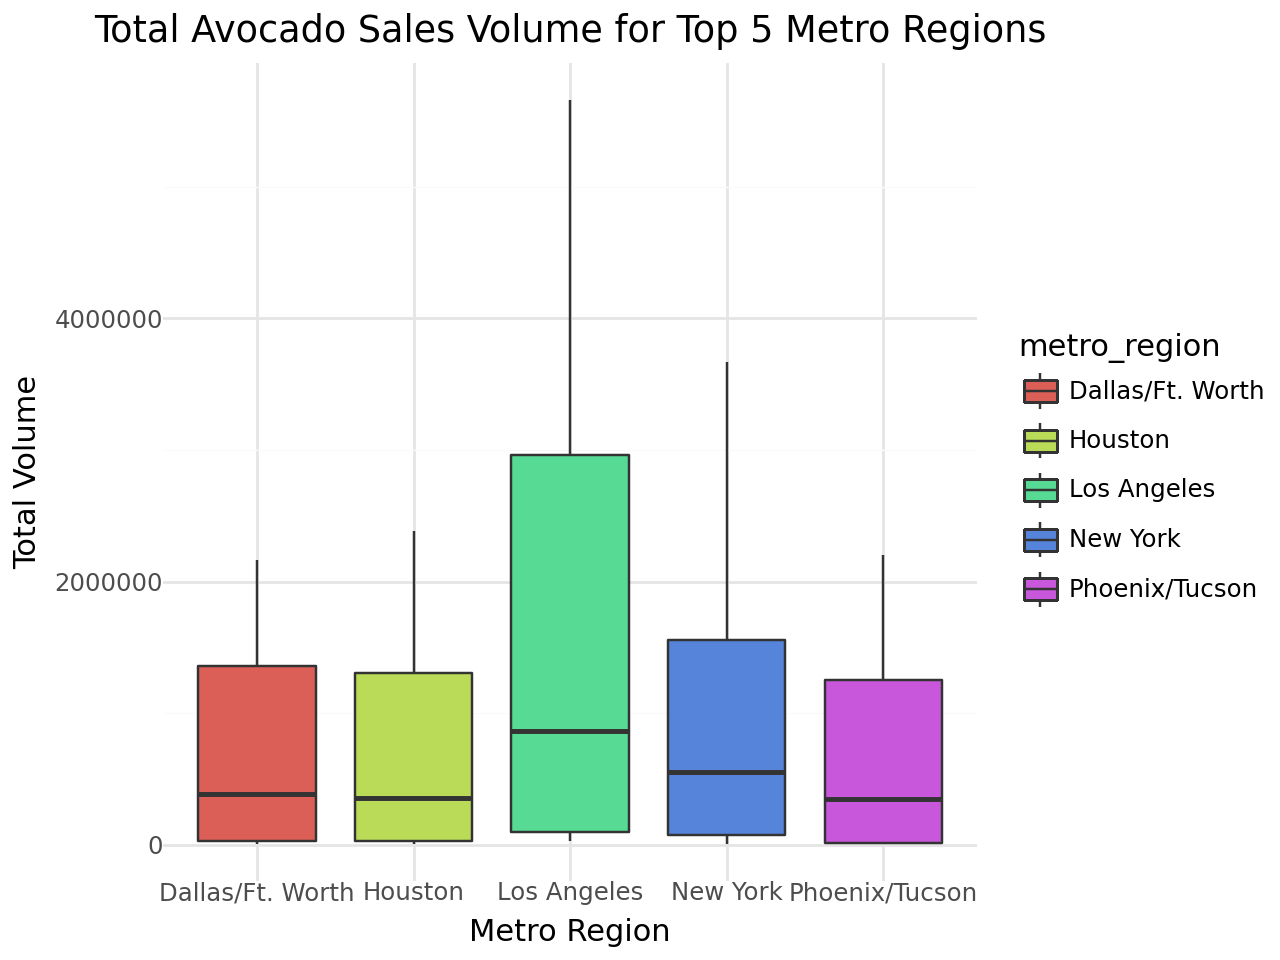

In [8]:
from plotnine import *

plot = (ggplot(avocado_clean[avocado_clean['metro_region'].isin(top_five_metro)],
                 aes(x='metro_region', y='total_volume',fill='metro_region')) +
        geom_boxplot() +
        labs(title='Total Avocado Sales Volume for Top 5 Metro Regions',
             x='Metro Region',
             y='Total Volume') +
        theme(axis_text_x=element_text(rotation=45, hjust=1)) +
        theme_minimal()
)

plot.show()

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [9]:
california_regions = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']
avocado_california = avocado_clean[avocado_clean['metro_region'].isin(california_regions)]
avocado_california

,date,average_price,total_volume,small,large,XL,total_bags,small_bags,large_bags,xlarge_bags,type,year,major_region,state_region,metro_region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,NaN,NaN,Los Angeles,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,NaN,NaN,Los Angeles,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,NaN,NaN,Sacramento,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,NaN,NaN,Sacramento,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,NaN,NaN,San Diego,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,NaN,NaN,Sacramento,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,NaN,NaN,San Diego,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,NaN,NaN,San Diego,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,NaN,NaN,San Francisco,11,29


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [10]:
avg_price_by_type = avocado_california.groupby(['metro_region', 'type'])['average_price'].mean().unstack()
avg_price_by_type['price_difference'] = avg_price_by_type['organic'] - avg_price_by_type['conventional']
summary_stats = avg_price_by_type['price_difference'].describe()

print("Summary statistics of the price difference between organic and conventional avocados:")
print(summary_stats)

print("\nRegions with the highest price difference (organic - conventional):")
print(avg_price_by_type.sort_values('price_difference', ascending=False))



Summary statistics of the price difference between organic and conventional avocados:
count    4.000000
mean     0.627435
std      0.089368
min      0.527778
25%      0.565817
50%      0.631503
75%      0.693121
max      0.718954
Name: price_difference, dtype: float64

Regions with the highest price difference (organic - conventional):
type           conventional   organic  price_difference
metro_region                                           
San Francisco      1.400490  2.119444          0.718954
San Diego          1.113856  1.798366          0.684510
Sacramento         1.295359  1.873856          0.578497
Los Angeles        1.047124  1.574902          0.527778


<ipython-input-11-efe59f35dd81>:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


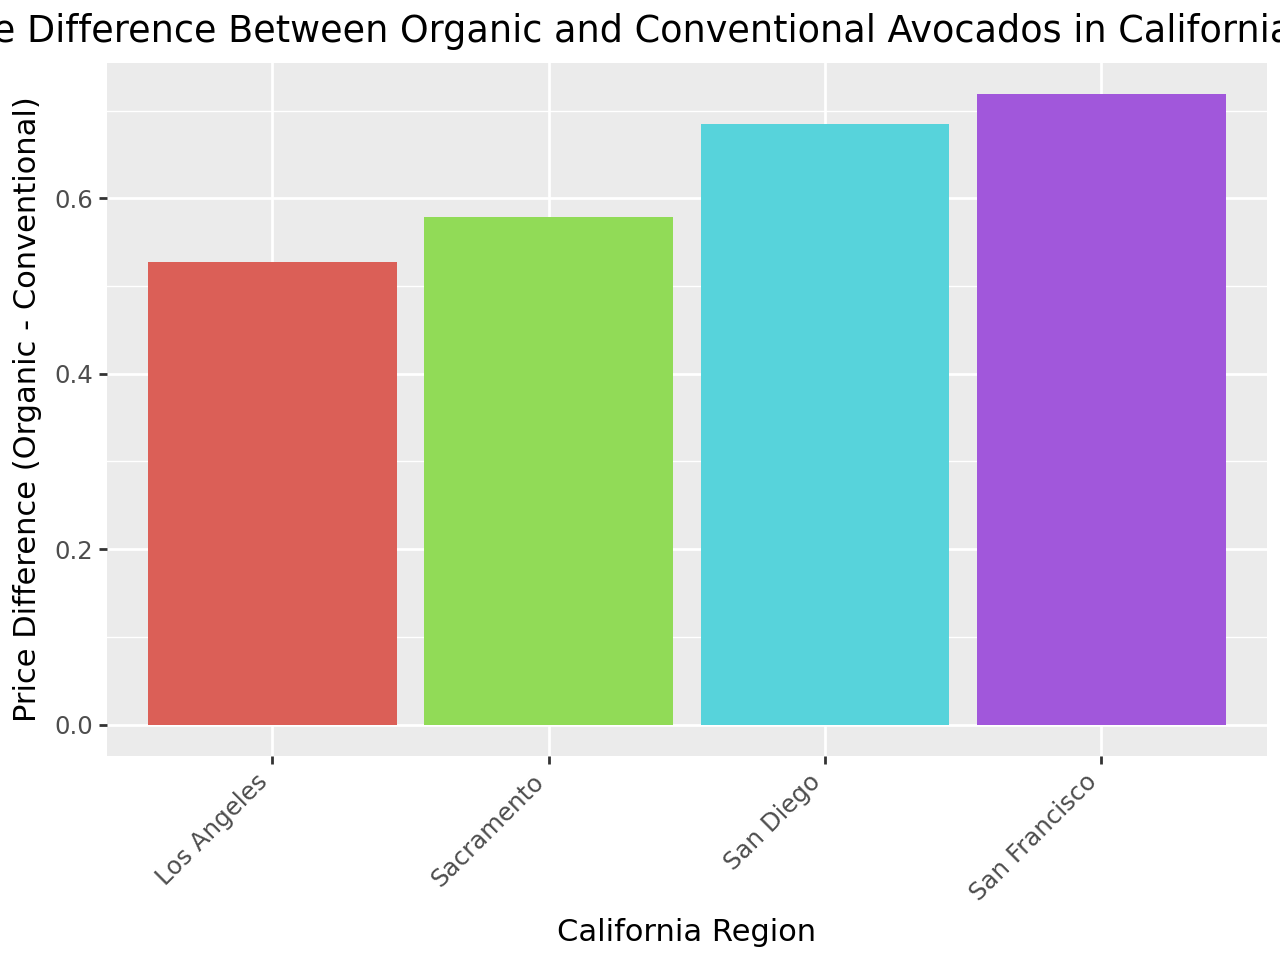

In [11]:
plot = (
    ggplot(avg_price_by_type.reset_index(), aes(x='metro_region', y='price_difference', fill='metro_region')) +
    geom_bar(stat='identity', show_legend=False) +
    labs(title='Price Difference Between Organic and Conventional Avocados in California Regions',
         x='California Region',
         y='Price Difference (Organic - Conventional)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

print(plot)

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

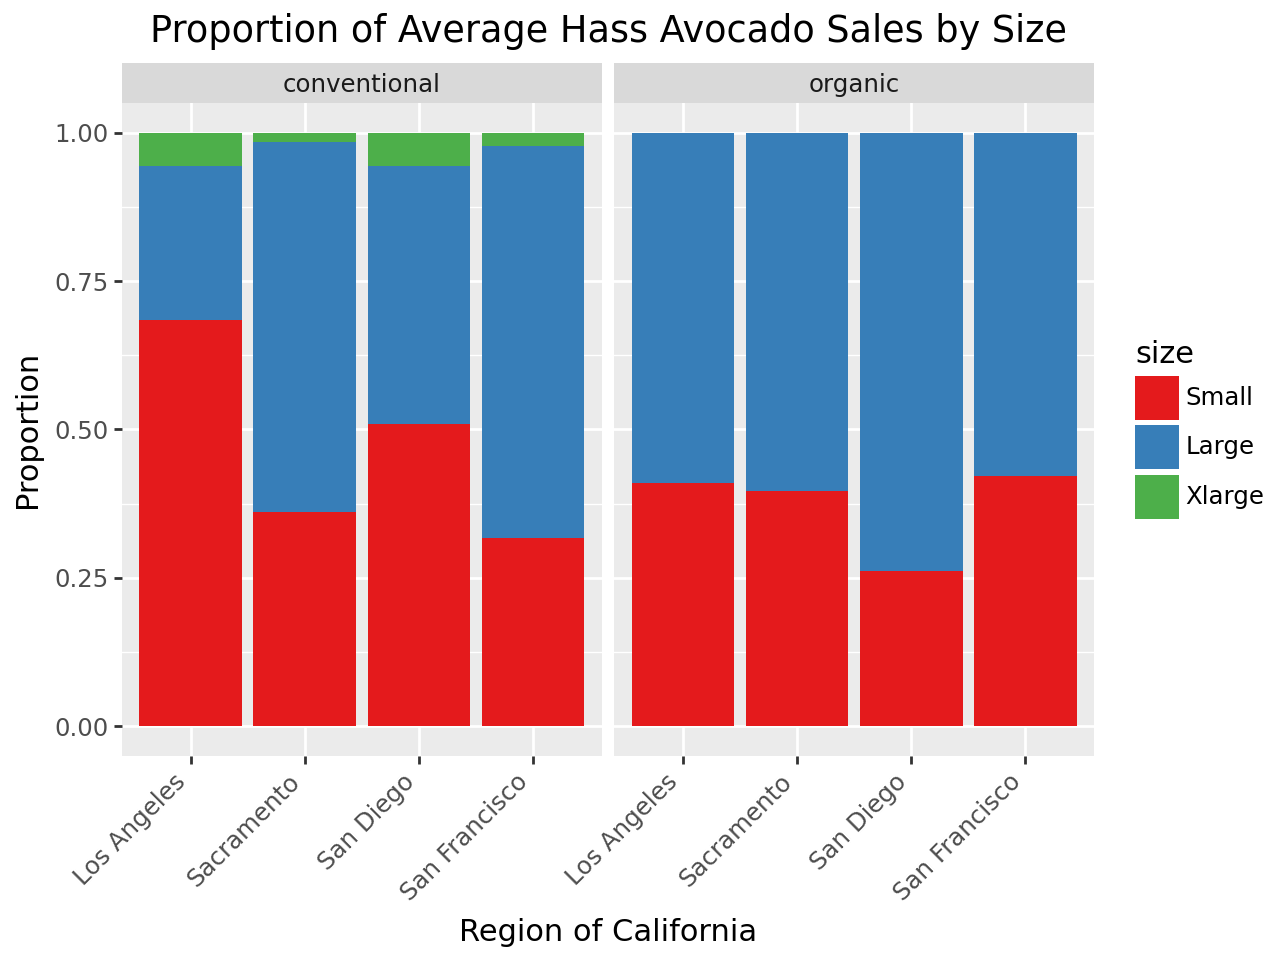

In [16]:

df_grouped = avocado_california.groupby(['metro_region', 'type']).agg(
    xlarge_size_sum=('XL', 'sum'),
    small_size_sum=('small', 'sum'),
    large_size_sum=('large', 'sum')
).reset_index()


df_grouped['total_bags_sum'] = df_grouped['small_size_sum'] + df_grouped['large_size_sum'] + df_grouped['xlarge_size_sum']

df_grouped['xlarge_proportion'] = df_grouped['xlarge_size_sum'] / df_grouped['total_bags_sum']
df_grouped['small_proportion'] = df_grouped['small_size_sum'] / df_grouped['total_bags_sum']
df_grouped['large_proportion'] = df_grouped['large_size_sum'] / df_grouped['total_bags_sum']

df_melted = df_grouped.melt(id_vars=['metro_region', 'type'],
                            value_vars=['small_proportion', 'large_proportion', 'xlarge_proportion'],
                            var_name='size', value_name='proportion')

df_melted['size'] = df_melted['size'].replace({
    'small_proportion': 'Small',
    'large_proportion': 'Large',
    'xlarge_proportion': 'Xlarge'
})

df_melted['size'] = pd.Categorical(df_melted['size'], categories=['Small', 'Large', 'Xlarge'], ordered=True)

plot = (
    ggplot(df_melted, aes(x='metro_region', y='proportion', fill='size')) +
    geom_bar(stat='identity', position=position_stack(reverse=True)) +
    facet_wrap('~type', ncol=2) +
    labs(title='Proportion of Average Hass Avocado Sales by Size',
         x='Region of California', y='Proportion', fill="size") +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    scale_fill_brewer(type='qual', palette='Set1')
)

plot


Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

In [27]:
import pandas as pd
import numpy as np

california_state = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

house_price = pd.DataFrame({
    'metro_region': np.repeat(california_state, 100),
    'house_price': np.concatenate([
        np.random.normal(900, 50, 100),
        np.random.normal(750, 45, 100),
        np.random.normal(500, 40, 100),
        np.random.normal(1050, 60, 100)
    ])
})

In [28]:
joined_data = pd.merge(avocado_california, house_price, on='metro_region', how='left')

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

<ipython-input-29-20c14b1b3189>:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


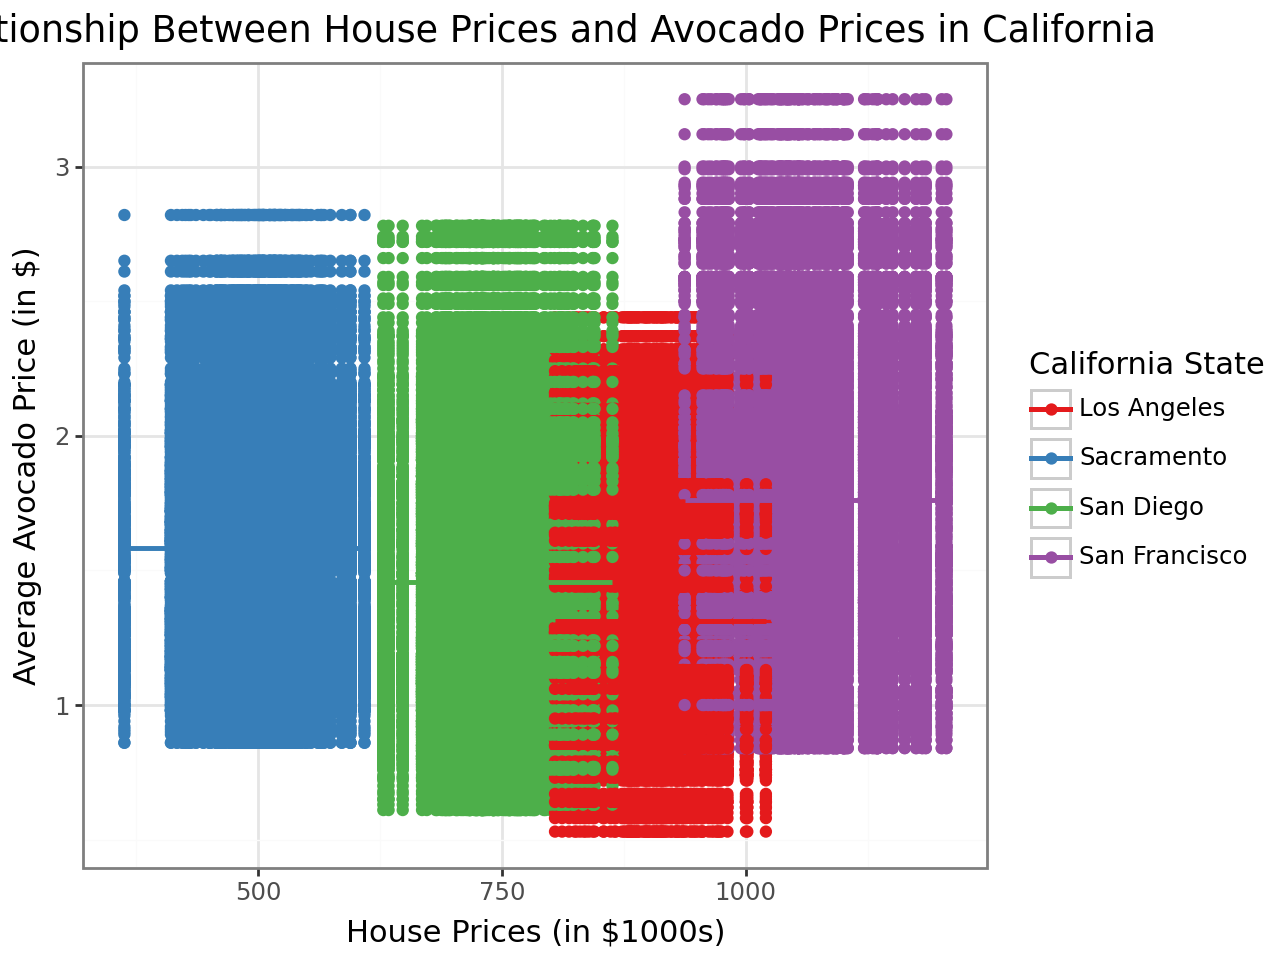

In [29]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw

print(
    ggplot(joined_data, aes(x='house_price', y='average_price', color='metro_region')) +
    geom_point() +
    geom_smooth(method='lm', se=False) +
    labs(title='Relationship Between House Prices and Avocado Prices in California',
         x='House Prices (in $1000s)',
         y='Average Avocado Price (in $)',
         color='California State') +
    scale_color_brewer(type='qual', palette='Set1') +
    theme_bw()
)

The graph indicates that high housing prices pose a substantial obstacle to homeownership for many people, not just Millennials. This can also be interpreted by saying that regions with house higher price tend to buy excotic fruits like avacado.
Thus, it is essential to take into account the wider economic factors when addressing the challenges related to housing affordability.

Chatgpt was used to asnwer part 5, 6 , 7, 8 and while aswering the outside data.